In [45]:
library(ggplot2)
library(RColorBrewer)
library(tidyverse)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [26]:
ordination_tab <- read.delim("ordination_mod.txt", h=FALSE)
metadata <- read.delim("metadata.tsv", h=TRUE)

In [27]:
proportion_explained <- ordination_tab[1,]
ordination_tab <- ordination_tab[-1,]
pcoa_dims <- data.frame(SampleID = ordination_tab[,1],
                        Dim1 = ordination_tab[,2],
                        Dim2 = ordination_tab[,3],
                        Dim3 = ordination_tab[,4])

pcoa_meta <- merge(metadata, pcoa_dims, by.x="SampleID", by.y="SampleID")

In [39]:
Group <- c("Diabetes_Akkermansia", "Diabetes", "No_Diabetes")

pcoa_meta$Group <- factor(pcoa_meta$Group,
                   levels = Group, ordered = TRUE)

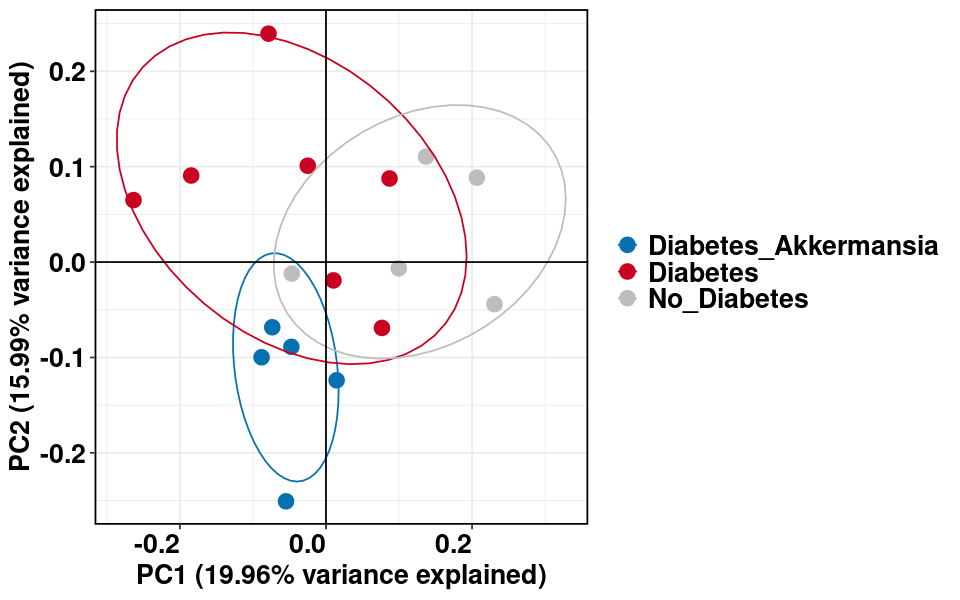

In [57]:
options(repr.plot.width=8, repr.plot.height=5)

clustid <- pcoa_meta$Group 
my_palette <- c("#0571b0", "#ca0020", "#bdbdbd")


p <- ggplot(pcoa_meta, aes(Dim1, Dim2, color=factor(clustid)))
        p <- p + 
        geom_point(size = 4) + 
        #stat_ellipse() +
        stat_ellipse(level = 0.8) +
        scale_color_manual(values = my_palette) +
        geom_hline(yintercept=0) +
        geom_vline(xintercept=0) +
        labs(x ="PC1 (19.96% variance explained)", 
             y = "PC2 (15.99% variance explained)") +
        theme_bw() + guides(fill=guide_legend(ncol=1))  +
        theme(axis.text.x = element_text(hjust = 1, size = 16, colour = "black", face="bold"),
              axis.text.y = element_text(hjust = 1, size = 16, colour = "black", face="bold"),
              axis.text = element_text(size = 16, colour = "black", face="bold"),
              axis.title = element_text(size = 16, colour = "black", face="bold"),
              panel.background = element_blank(),
              panel.border = element_rect(colour = "black", fill=NA, size=1),
              legend.title=element_blank(),
              legend.text=element_text(size=16, colour = "black", face="bold"),
              legend.key.width = unit(0.5,"cm"), legend.key.height = unit(0.5,"cm"))

print(p)